# Case Study : Lead Scoring

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Import Python libraries

In [176]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Statsmodel Package
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

# Statsmodel Package
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Reading and Understand the Data

In [177]:
# Load Data
df_leads = pd.read_csv('Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [178]:
# Check Rows and Columns
df_leads.shape

(9240, 37)

In [179]:
# Check Columns/Features details
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [180]:
# Chcek All numeric Columns/Features
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [181]:
# Chcek Missing value for all the Columns/Features
round(df_leads.isnull().sum()/len(df_leads.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [182]:
# Check Values
df_leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


###### Selected value Treatment
As we can observe that there are **select** values for many column. Customer might have not select any option from the list, hence it shows select. 
- Select values are as good as NULL.

In [183]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [184]:
#check percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Missing Value Treatment
##### Selected Below features for treatment:
- Lead Source : 0.39%
- TotalVisits : 1.48%
- Page Views Per Visit : 1.48%
- Last Activity : 1.11%
- Country : 26.63%
- Specialization : 36.58%
- How did you hear about X Education : 78.46%
- What is your current occupation : 29.11%
- What matters most to you in choosing a course : 29.32%
- Tags : 36.29%
- Lead Quality : 51.59%
- Lead Profile : 74.19%
- City : 39.71%
- Asymmetrique Activity Index : 45.65%
- Asymmetrique Profile Index : 45.65%
- Asymmetrique Activity Score : 45.65%
- Asymmetrique Profile Score : 45.65%

In [185]:
# Check Columns 'Lead Number' for Duplicate values
sum(df_leads['Lead Number'].duplicated()) == 0

True

In [186]:
# Check Columns 'Prospect ID' for Duplicate values
sum(df_leads['Prospect ID'].duplicated()) == 0

True

- Both **'Lead Number'** and **'Prospect ID'** have all unique values we can dorp any one of them.

In [187]:
# Drop Column 'Lead Number'
df_leads.drop('Lead Number', axis=1, inplace = True)
df_leads.shape

(9240, 36)

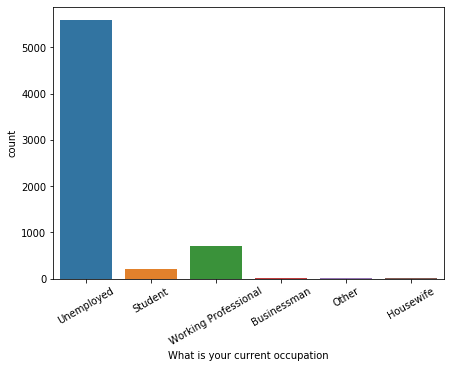

In [188]:
# Check Other features
feature = ['What matters most to you in choosing a course', 'What is your current occupation']
plt.figure(figsize = (7, 5))
sns.countplot('What is your current occupation', data = df_leads)
plt.xticks(rotation = 30)
plt.show()

In [189]:
#check percentage of missing values
round(df_leads['What is your current occupation'].value_counts(normalize=True)*100,2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

###### Feature 'What is your current occupation'
- Above 85% entries are of Unemployed so we can impute "Unemployed" in the null columns, so we can definitely impute mising values as "Unemployed"

In [190]:
# Impute Missing Values
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

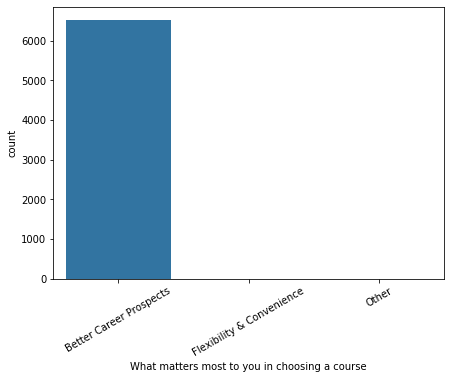

In [191]:
plt.figure(figsize = (7, 5))
sns.countplot('What matters most to you in choosing a course', data = df_leads)
plt.xticks(rotation = 30)
plt.show()

In [192]:
#check percentage of missing values
round(df_leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

###### What matters most to you in choosing this course
- We can see that more than 99% percentage of them has filled as **Better Career Prospects**
- Column **Better Career Prospects** is highly skewed, we can drop this column

In [193]:
df_leads.drop('What matters most to you in choosing a course', axis=1, inplace = True)

###### Tags
- Tags assigned to customers indicating the current status of the lead.
- Null Value percentage: 36.29%
- Since it is score variable, We can drop this column

In [194]:
df_leads.drop('Tags', axis=1, inplace = True)

In [195]:
#Dropping all columns with more than 45 % it will include columns which we want remove
df_leads.drop(df_leads.columns[df_leads.isnull().sum()/df_leads.shape[0]>0.45].tolist(), axis=1, inplace = True)
df_leads.shape

(9240, 27)

In [196]:
#check percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              36.58
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


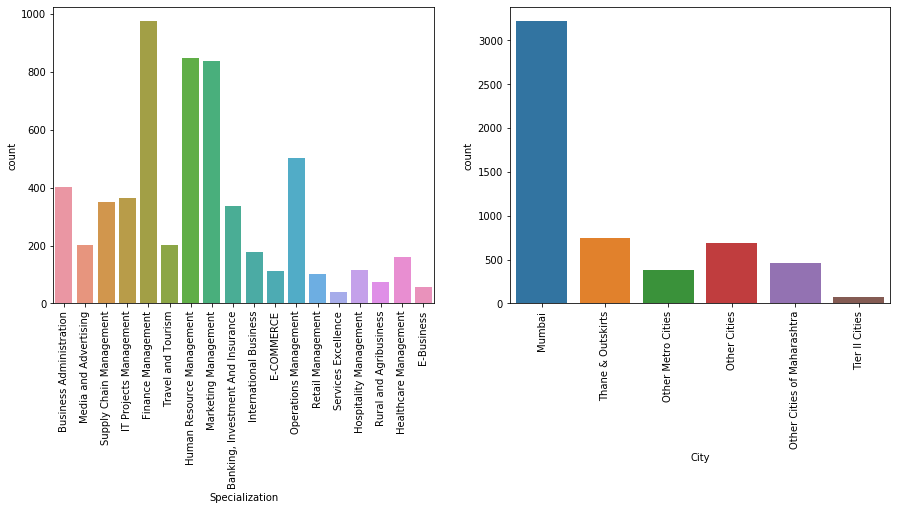

In [197]:
feature =  ['Specialization', 'City']
plt.figure(figsize = (15, 12))
for i in enumerate(feature):
    plt.subplot(2, 2,i[0]+1)
    sns.countplot(i[1], data = df_leads)
    plt.xticks(rotation = 90)

In [198]:
#Get value counts
round(df_leads.City.value_counts(normalize=True)*100,2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

#### Feature Analysis:
##### Specialization
- Look like customer does not find any specific specialization in the selection and left the field blanks. Let's make a category "Not Specified" for missing values.
- Specialization as Management have higher number of leads. This feature should not be dropped 
- We can combine Management Specializations because they show similar trends
- we can replace specialization with low frequency with "Other Specialization"

##### City
- Around 75% of the data is Mumbai so we can impute Mumbai in the missing values.

In [199]:
# Replace Missing values with Mumbai for column City
df_leads.City = df_leads.City.replace(np.nan, 'Mumbai')

In [200]:
# Replace Missing values with Others for column Specialization
df_leads.Specialization = df_leads.Specialization.replace(np.nan, 'Not Specified')

In [201]:
# Group All Management Specializations 
df_leads.Specialization = df_leads.Specialization.replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                           'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [202]:
# Replace Specialization with low frequency with "Other Specialization"
df_leads.Specialization = df_leads.Specialization.replace(['Services Excellence','E-Business',
                                                           'Rural and Agribusiness','E-COMMERCE',] ,'Other Specilization')

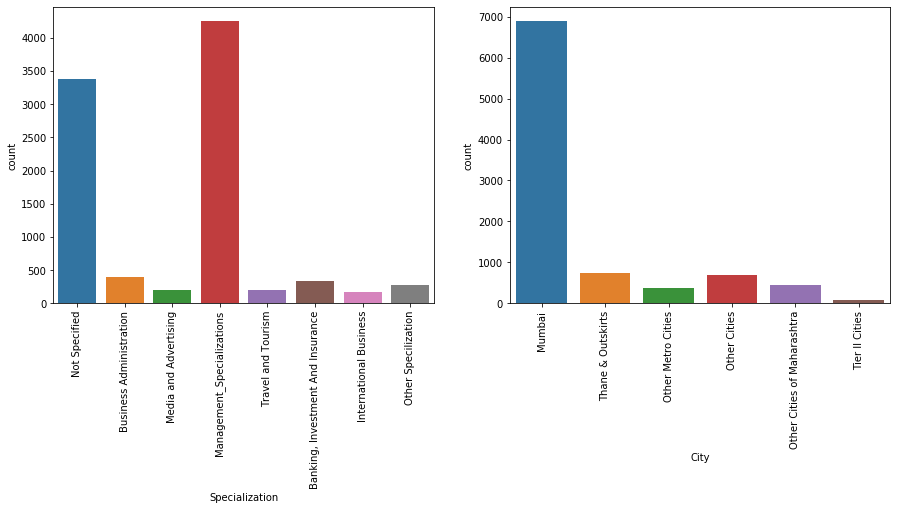

In [203]:
feature =  ['Specialization', 'City']
plt.figure(figsize = (15, 12))
for i in enumerate(feature):
    plt.subplot(2, 2,i[0]+1)
    sns.countplot(i[1], data = df_leads)
    plt.xticks(rotation = 90)

In [204]:
#Get value counts
round(df_leads.Specialization.value_counts(normalize=True)*100,2)

Management_Specializations           46.03
Not Specified                        36.58
Business Administration               4.36
Banking, Investment And Insurance     3.66
Other Specilization                   3.05
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Name: Specialization, dtype: float64

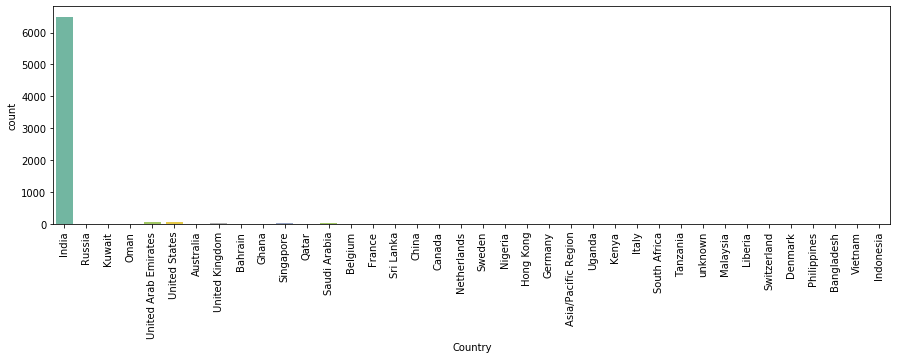

In [205]:
plt.figure(figsize =(15,4))
sns.countplot(df_leads.Country,palette="Set2")
plt.xticks(rotation = 90)
plt.show()

In [206]:
#Get value counts
round(df_leads.Country.value_counts(normalize=True)*100,2)

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Bahrain                  0.10
Hong Kong                0.10
France                   0.09
Oman                     0.09
unknown                  0.07
Kuwait                   0.06
Nigeria                  0.06
Canada                   0.06
Germany                  0.06
South Africa             0.06
Sweden                   0.04
Philippines              0.03
Ghana                    0.03
Italy                    0.03
China                    0.03
Bangladesh               0.03
Belgium                  0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Netherlands              0.03
Kenya                    0.01
Switzerland              0.01
Indonesia                0.01
Sri Lanka                0.01
Liberia                  0.01
Denmark   

#### Country
- 95 % of the country is India.
- Column is highly skewed , we can drop this column

In [207]:
df_leads.drop('Country', axis=1, inplace = True)
df_leads.shape

(9240, 26)

In [208]:
#check percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

###### Lead Source, TotalVisits, Page Views Per Visit, Last Activity
Rest of the columns have missing values under 2%, so we can drop these rows.
- Lead Source : 0.39%
- TotalVisits : 1.48%
- Page Views Per Visit : 1.48%
- Last Activity : 1.11%

In [209]:
# drop rows containing missing values
df_leads.dropna(inplace = True)

In [210]:
#check percentage of missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

#### Now there no missing values

In [211]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
Prospect ID                                 9074 non-null object
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Specialization                              9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074

#### Changing data type of feature
- **Converted**

In [212]:
# Converting datatype of target variable 'Converted' as categorical
df_leads.Converted = df_leads.Converted.astype(object)

# Exploratory Data Analytics
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

## Univariate Analysis


### Box Plot for each Numerical Variables

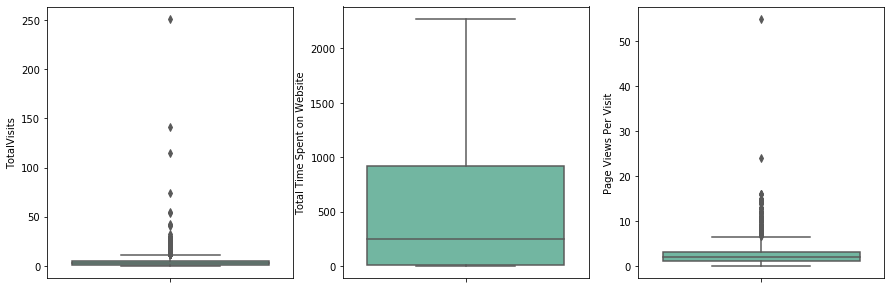

In [213]:
# Check outliers for numerical columns
n_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize =(15,5))
for i in enumerate(n_features):
    plt.subplot(1,3, i[0]+1)
    sns.boxplot(x= i[1], data = df_leads ,palette="Set2" ,orient = 'v')

In [214]:
df_leads.describe(percentiles=[.01,.05,.1,.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000


###### We can see outliers in the all numeric columns. We can cap higher outliers.

In [215]:
# Cap the Outliers value 
TV_Q4 = df_leads['TotalVisits'].quantile(0.99)
TS_Q4 = df_leads['Total Time Spent on Website'].quantile(0.99)
PV_Q4 = df_leads['Page Views Per Visit'].quantile(0.99)

df_leads['TotalVisits'][df_leads['TotalVisits']>= TV_Q4] = TV_Q4
df_leads['Total Time Spent on Website'][df_leads['Total Time Spent on Website']>= TS_Q4] = TS_Q4
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit']>= PV_Q4] = PV_Q4

#### Categorical Varaible 'Converted'

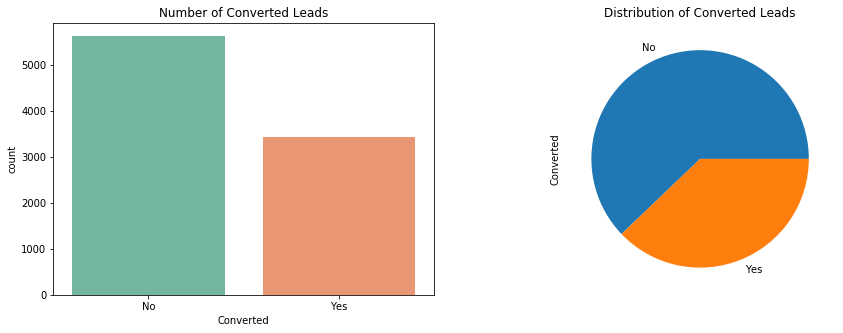

In [216]:
# Countplot for Converted
plt.figure(figsize=(15,5))
plt.title('Converted Leads')
plt.subplot(121)
plt.title('Number of Converted Leads')
sns.countplot(df_leads.Converted,palette="Set2")
plt.xticks([0,1],('No','Yes'))
plt.subplot(122)
plt.title('Distribution of Converted Leads')
df_leads.Converted.value_counts().plot(kind='pie', labels = ['No','Yes'])
plt.show()

In [217]:
print('Percentage of Leads Converted -', round(df_leads.Converted.value_counts(normalize=True)*100,2)[1], '%')

Percentage of Leads Converted - 37.86 %


### Coversion rate of leads is around 37 % 

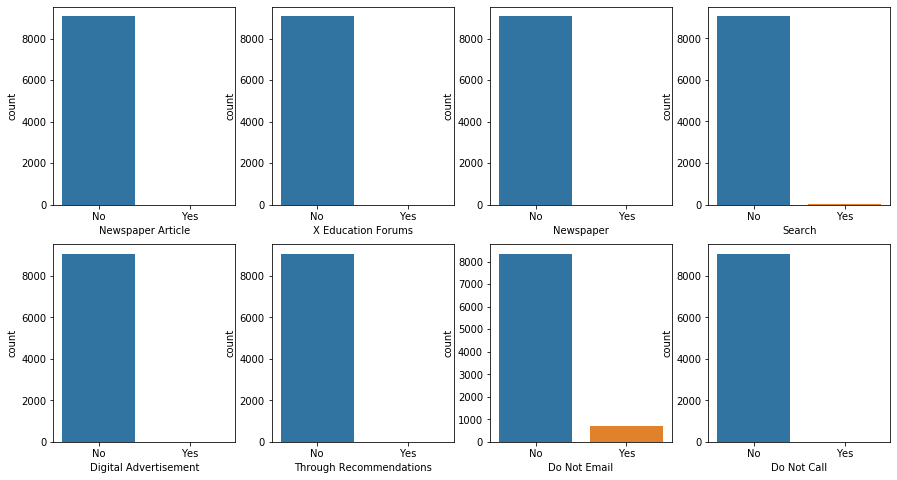

In [218]:
c_features = ["Newspaper Article","X Education Forums","Newspaper", "Search",
"Digital Advertisement","Through Recommendations","Do Not Email","Do Not Call"] 
plt.figure(figsize =(15,8))
for i in enumerate(c_features):
    plt.subplot(2, 4,i[0]+1)
    sns.countplot(i[1], data = df_leads)

#### Insights:
- All above **Features** are highly Skewed and does not tell much. We can drop these columns.

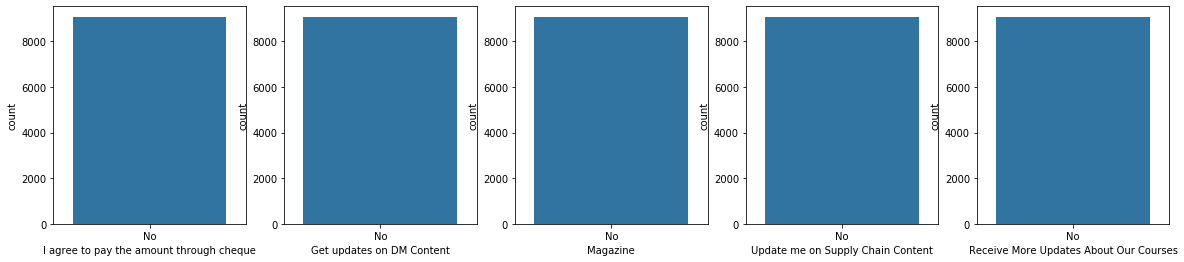

In [219]:
c_features = [ "I agree to pay the amount through cheque",
            "Get updates on DM Content","Magazine",
            "Update me on Supply Chain Content",
            "Receive More Updates About Our Courses"] 
plt.figure(figsize =(20,4))
for i in enumerate(c_features):
    plt.subplot(1, 5,i[0]+1)
    sns.countplot(i[1], data = df_leads)

#### Insights:
- All above **Features** are 100% No. We can drop these columns.

In [220]:
#Print Value counts for features,
features = df_leads[["Lead Origin","What is your current occupation","City",
                     "A free copy of Mastering The Interview"]]
for i in features:
    print('Column "{0}" values percentage'.format(i))
    print(round(df_leads[i].value_counts(normalize=True)*100,2))
    print('\n')

Column "Lead Origin" values percentage
Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead Import                 0.33
Name: Lead Origin, dtype: float64


Column "What is your current occupation" values percentage
Unemployed              89.92
Working Professional     7.46
Student                  2.27
Other                    0.17
Housewife                0.10
Businessman              0.09
Name: What is your current occupation, dtype: float64


Column "City" values percentage
Mumbai                         74.41
Thane & Outskirts               8.21
Other Cities                    7.49
Other Cities of Maharashtra     4.92
Other Metro Cities              4.15
Tier II Cities                  0.82
Name: City, dtype: float64


Column "A free copy of Mastering The Interview" values percentage
No     68.17
Yes    31.83
Name: A free copy of Mastering The Interview, dtype: float64




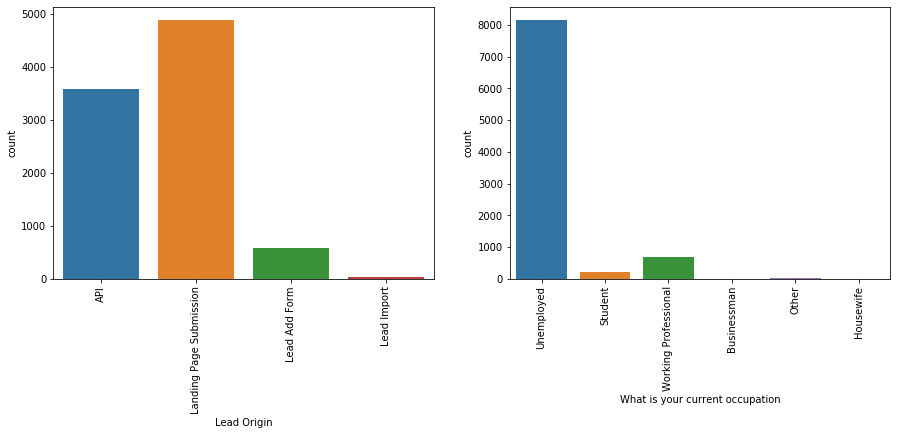

In [221]:
categorical = ["Lead Origin","What is your current occupation"]
plt.figure(figsize =(15,5))
for i in enumerate(categorical):
    plt.subplot(1, 2,i[0]+1)
    sns.countplot(i[1], data = df_leads)
    plt.xticks(rotation = 90)

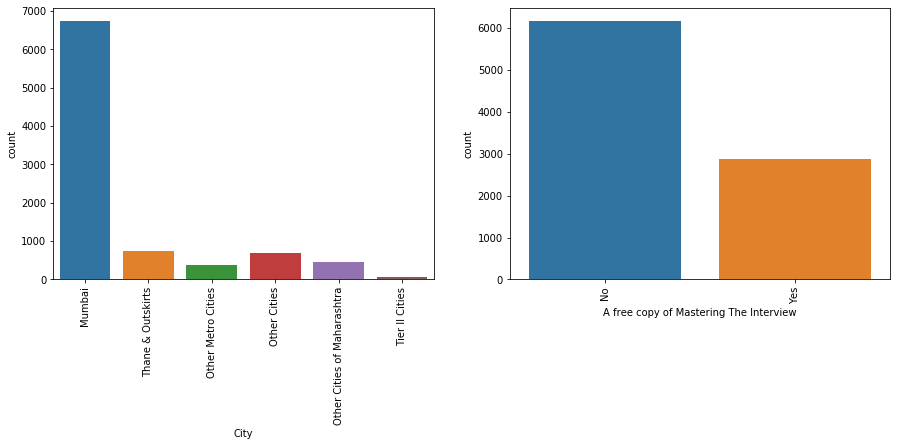

In [222]:
categorical = ["City","A free copy of Mastering The Interview"]
plt.figure(figsize =(15,5))
for i in enumerate(categorical):
    plt.subplot(1, 2,i[0]+1)
    sns.countplot(i[1], data = df_leads)
    plt.xticks(rotation = 90)

#### These Colums looks usefull 

- "City"
- "Lead Origin",
- "What is your current occupation",,
- "A free copy of Mastering The Interview"

In [223]:
# Check Column Values Percent
round(100*df_leads["Lead Source"].value_counts(normalize=True),2)

Google               31.61
Direct Traffic       28.03
Olark Chat           19.32
Organic Search       12.72
Reference             4.88
Welingak Website      1.42
Referral Sites        1.38
Facebook              0.34
bing                  0.07
google                0.06
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
blog                  0.01
Pay per Click Ads     0.01
NC_EDM                0.01
testone               0.01
welearnblog_Home      0.01
WeLearn               0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

#### Lead Source
- We can group some of the lower frequency occuring labels under a common label 'Others'
- We can combine columns 'google' and 'Google'

In [224]:
#replacing 'google' with 'Google' and combining low frequency values
df_leads['Lead Source'] = df_leads['Lead Source'].replace('google','Google')
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['Welingak Website', 'Referral Sites', 'Facebook',
                                                           'bing','Click2call','Social Media','Press_Release',
                                                           'Live Chat','WeLearn','testone','NC_EDM','welearnblog_Home',
                                                           'blog','youtubechannel','Pay per Click Ads'] ,'Others')    

In [225]:
# Check Column Values Percent
round(100*df_leads["Last Notable Activity"].value_counts(normalize=True),2)

Modified                        36.00
Email Opened                    31.11
SMS Sent                        23.72
Page Visited on Website          3.50
Olark Chat Conversation          2.02
Email Link Clicked               1.91
Email Bounced                    0.66
Unsubscribed                     0.50
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Resubscribed to emails           0.01
Email Received                   0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Name: Last Notable Activity, dtype: float64

#### Last Notable Activity
- We can group some of the lower frequency occuring labels under a common label 'Other Notable Activity'

In [226]:
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(['View in browser link Clicked', 
                                                                               'Approached upfront', 'Resubscribed to emails',
                                                                               'Email Received','Form Submitted on Website',
                                                                              'Email Marked Spam','Had a Phone Conversation',
                                                                              'Unreachable','Unsubscribed',
                                                                              'Email Bounced','Email Link Clicked'] ,'Other Notable Activity')                                                   

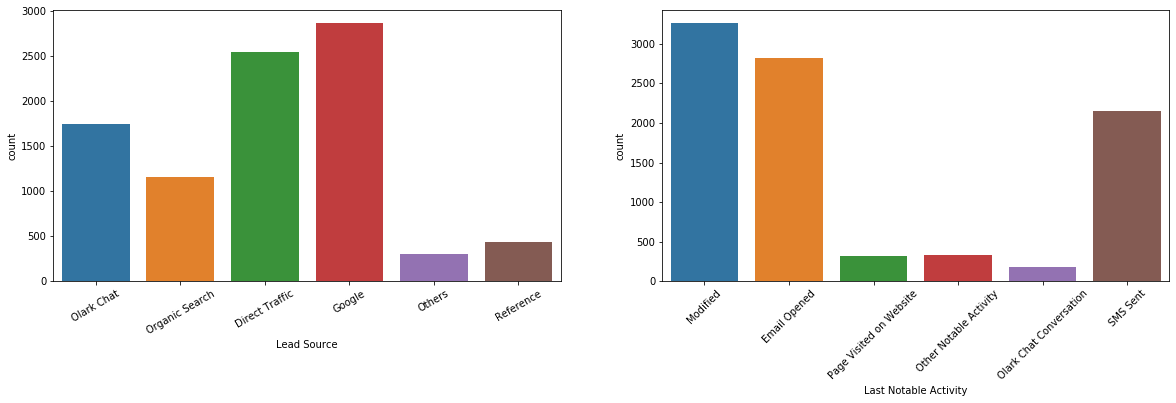

In [227]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(df_leads["Lead Source"])
plt.xticks(rotation = 30)
plt.subplot(122)
sns.countplot(df_leads["Last Notable Activity"])
plt.xticks(rotation = 45)
plt.show()

- **Lead Source** : This variable looks useful
- **Last Notable Activity** : This variable looks useful

In [228]:
# Check Column Values Percent
round(100*df_leads["Last Notable Activity"].value_counts(normalize=True),2)

Modified                   36.00
Email Opened               31.11
SMS Sent                   23.72
Other Notable Activity      3.65
Page Visited on Website     3.50
Olark Chat Conversation     2.02
Name: Last Notable Activity, dtype: float64

In [229]:
# Check Column Values Percent
round(100*df_leads["Last Activity"].value_counts(normalize=True),2)

Email Opened                    37.82
SMS Sent                        29.93
Olark Chat Conversation         10.71
Page Visited on Website          7.05
Converted to Lead                4.72
Email Bounced                    3.44
Email Link Clicked               2.94
Form Submitted on Website        1.28
Unreachable                      0.99
Unsubscribed                     0.65
Had a Phone Conversation         0.28
View in browser link Clicked     0.07
Approached upfront               0.06
Email Marked Spam                0.02
Email Received                   0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

- **Last Activity** : Last activity when the lead was closed by the sales team. We can drop this column

### Dropping Columns

In [230]:
df_leads.drop([ "Newspaper Article","X Education Forums","Newspaper", "Search","Digital Advertisement","Through Recommendations",
                "Do Not Email", "Do Not Call","I agree to pay the amount through cheque","Get updates on DM Content","Magazine",
                "Last Activity","Update me on Supply Chain Content","Receive More Updates About Our Courses"],
                axis =1, inplace= True)

In [231]:
df_leads.shape

(9074, 12)

In [232]:
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Not Specified,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Not Specified,Unemployed,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Not Specified,Unemployed,Mumbai,No,Modified


## Bivariate Analysis

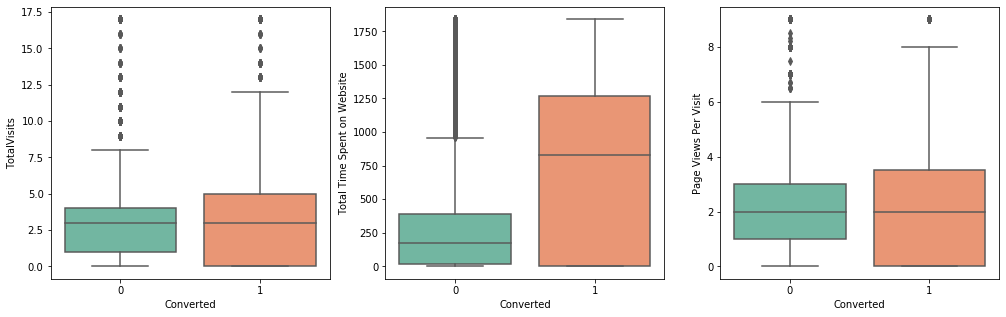

In [233]:
# Box Plot
plt.figure(figsize=(17,5))
plt.subplot(131)
sns.boxplot(x='Converted', y='TotalVisits', data=df_leads, palette="Set2")
plt.subplot(132)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df_leads, palette="Set2")
plt.subplot(133)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=df_leads, palette="Set2")
plt.show()

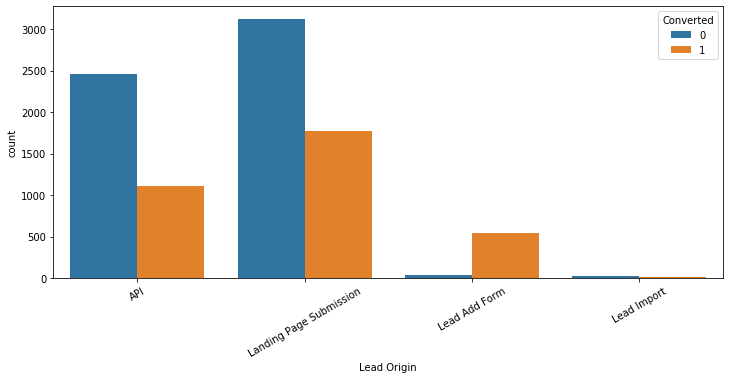

In [234]:
# 'Lead Source', 'Converted',
plt.figure(figsize=(12,5))
sns.countplot("Lead Origin", hue = "Converted" , data = df_leads)
plt.xticks(rotation = 30)
plt.show()

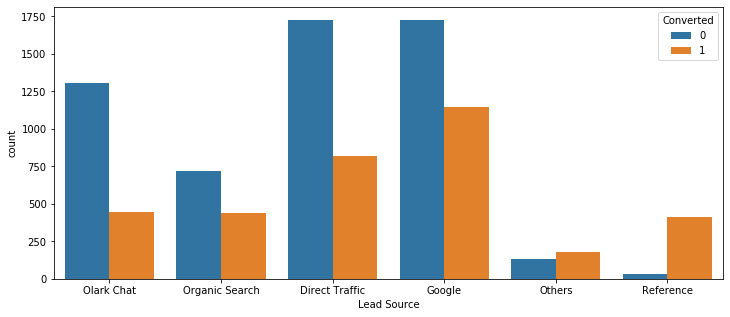

In [235]:
plt.figure(figsize=(12,5))
sns.countplot(x = "Lead Source", hue = "Converted" , data = df_leads)
plt.show()

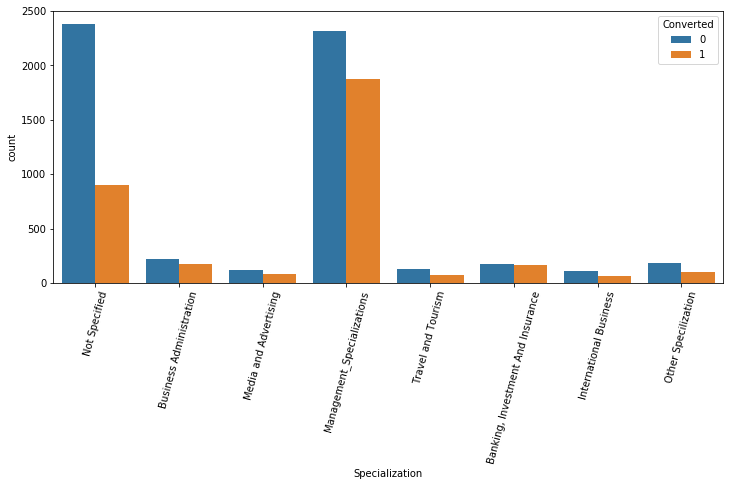

In [236]:
plt.figure(figsize=(12,5))
sns.countplot("Specialization", hue = "Converted" , data = df_leads)
plt.xticks(rotation = 75)
plt.show()

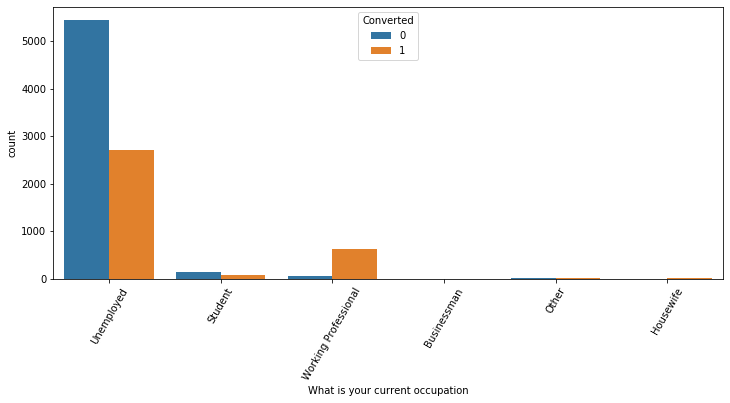

In [237]:
plt.figure(figsize=(12,5))
sns.countplot("What is your current occupation", hue = "Converted" , data = df_leads)
plt.xticks(rotation = 60)
plt.show()

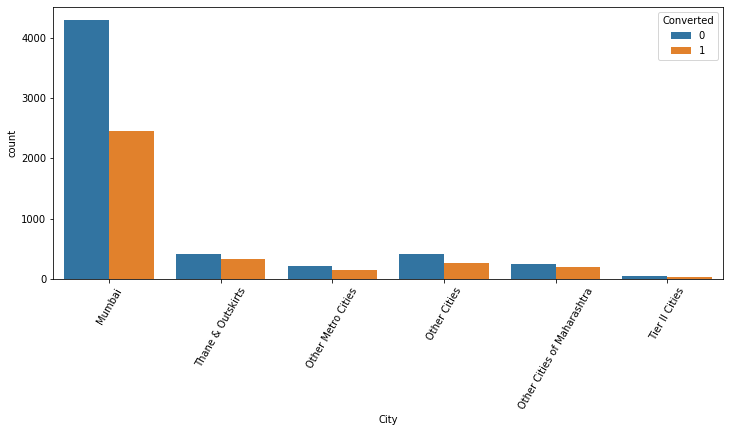

In [238]:
plt.figure(figsize=(12,5))
sns.countplot("City", hue = "Converted" , data = df_leads)
plt.xticks(rotation = 60)
plt.show()

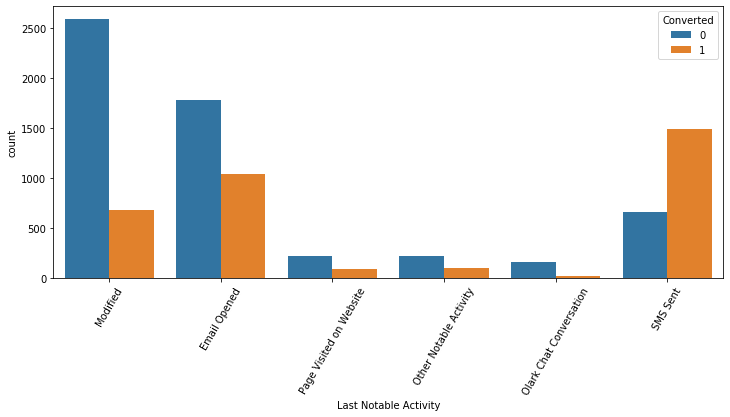

In [239]:
plt.figure(figsize=(12,5))
sns.countplot("Last Notable Activity", hue = "Converted" , data = df_leads)
plt.xticks(rotation = 60)
plt.show()

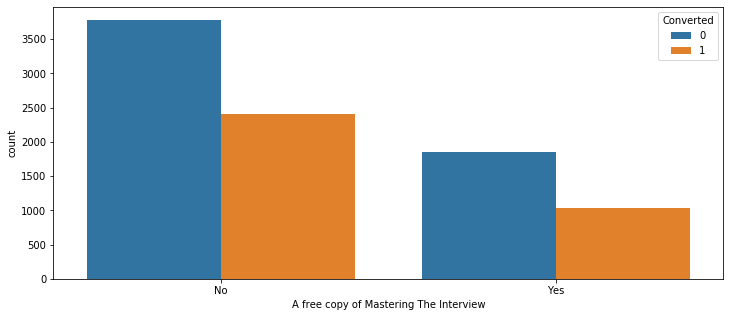

In [240]:
plt.figure(figsize=(12,5))
sns.countplot("A free copy of Mastering The Interview", hue = "Converted" , data = df_leads)
plt.show()

# Modelling

## Data Preparation
####  Converting some binary variables (Yes/No) to 1/0

In [241]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
free_copy = ["A free copy of Mastering The Interview"]
df_leads[free_copy] = df_leads[free_copy].apply(binary_map).astype('object')

In [242]:
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Not Specified,Unemployed,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Not Specified,Unemployed,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Not Specified,Unemployed,Mumbai,0,Modified


#### Create dummy features for categorical features with multiple levels

In [243]:
df_leads_new = pd.get_dummies(data = df_leads , columns=['City', 'Lead Origin', 'Lead Source', 'Specialization',
                                                         'Last Notable Activity', 'What is your current occupation'],
                                                        prefix = ['City', 'Lead_Origin', 'Lead_Source', 'Specialization',
                                                                 'Last Notable Activity', 'Current_Ocupation' ])
df_leads_new.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Current_Ocupation_Businessman,Current_Ocupation_Housewife,Current_Ocupation_Other,Current_Ocupation_Student,Current_Ocupation_Unemployed,Current_Ocupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [244]:
# Drop any 1 dummy created column for variables from features selected
df_leads_new.drop(['City_Tier II Cities', 'Lead_Origin_Lead Import', "Specialization_International Business",
                   'Last Notable Activity_Olark Chat Conversation', 'Current_Ocupation_Businessman'],
                axis =1, inplace= True)

In [245]:
df_leads_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                         9074 non-null object
Converted                                           9074 non-null object
TotalVisits                                         9074 non-null float64
Total Time Spent on Website                         9074 non-null int64
Page Views Per Visit                                9074 non-null float64
A free copy of Mastering The Interview              9074 non-null object
City_Mumbai                                         9074 non-null uint8
City_Other Cities                                   9074 non-null uint8
City_Other Cities of Maharashtra                    9074 non-null uint8
City_Other Metro Cities                             9074 non-null uint8
City_Thane & Outskirts                              9074 non-null uint8
Lead_Origin_API                                     9074 non-null uint8
Lead_Origin_Landing Pa

In [246]:
df_leads_new.shape

(9074, 37)

In [247]:
df_leads_new = df_leads_new.set_index('Prospect ID')

In [248]:
# Putting feature variable to X
X = df_leads_new.drop(['Converted'], axis=1)

In [249]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Lead_Origin_API,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Current_Ocupation_Housewife,Current_Ocupation_Other,Current_Ocupation_Student,Current_Ocupation_Unemployed,Current_Ocupation_Working Professional
Prospect ID,,,,,,,,,,,,,,,,,,,,,
7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.0,0,0.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2a272436-5132-4136-86fa-dcc88c88f482,5.0,674,2.5,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a,2.0,1532,2.0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
0cc2df48-7cf4-4e39-9de9-19797f9b38cc,1.0,305,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3256f628-e534-4826-9d63-4a8b88782852,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [250]:
# Putting response variable to y
y = df_leads_new['Converted']
y.head()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0
2a272436-5132-4136-86fa-dcc88c88f482    0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    0
3256f628-e534-4826-9d63-4a8b88782852    1
Name: Converted, dtype: object

In [251]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=333)

In [252]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 22b1f1dc-97ad-4477-b123-579e9194a128 to 560c7507-31eb-48d7-bd65-86c5d58fe163
Data columns (total 35 columns):
TotalVisits                                         6351 non-null float64
Total Time Spent on Website                         6351 non-null int64
Page Views Per Visit                                6351 non-null float64
A free copy of Mastering The Interview              6351 non-null object
City_Mumbai                                         6351 non-null uint8
City_Other Cities                                   6351 non-null uint8
City_Other Cities of Maharashtra                    6351 non-null uint8
City_Other Metro Cities                             6351 non-null uint8
City_Thane & Outskirts                              6351 non-null uint8
Lead_Origin_API                                     6351 non-null uint8
Lead_Origin_Landing Page Submission                 6351 non-null uint8
Lead_Origin_Lead Add Form         

In [253]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 2f3b20c1-fdd4-4455-95de-55e455d25413 to d77b2eae-2c7b-4605-9498-acf46abcac26
Data columns (total 35 columns):
TotalVisits                                         2723 non-null float64
Total Time Spent on Website                         2723 non-null int64
Page Views Per Visit                                2723 non-null float64
A free copy of Mastering The Interview              2723 non-null object
City_Mumbai                                         2723 non-null uint8
City_Other Cities                                   2723 non-null uint8
City_Other Cities of Maharashtra                    2723 non-null uint8
City_Other Metro Cities                             2723 non-null uint8
City_Thane & Outskirts                              2723 non-null uint8
Lead_Origin_API                                     2723 non-null uint8
Lead_Origin_Landing Page Submission                 2723 non-null uint8
Lead_Origin_Lead Add Form         

In [254]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

###  Feature Scaling

In [255]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Lead_Origin_API,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Current_Ocupation_Housewife,Current_Ocupation_Other,Current_Ocupation_Student,Current_Ocupation_Unemployed,Current_Ocupation_Working Professional
Prospect ID,,,,,,,,,,,,,,,,,,,,,
22b1f1dc-97ad-4477-b123-579e9194a128,-0.718659,-0.257083,-0.670063,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
525bc35d-8098-42fb-836b-4389cef11f14,-0.100413,0.288874,-0.418740,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
0f468d47-c064-455e-b8bc-74843b6a2c6a,-0.100413,-0.175928,0.335231,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9b6d6cb4-d943-47cd-b708-e09083a76f94,2.372572,0.954720,0.672004,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
493597b0-14bf-446b-b11b-3f0e38c424ae,3.299942,-0.336395,0.586554,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Model Building
- Using RFE(Recursive feature elimination) and manual approach

In [256]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X_train, y_train)

In [257]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True])

In [258]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 13),
 ('City_Mumbai', False, 17),
 ('City_Other Cities', False, 16),
 ('City_Other Cities of Maharashtra', False, 7),
 ('City_Other Metro Cities', False, 18),
 ('City_Thane & Outskirts', False, 14),
 ('Lead_Origin_API', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Source_Direct Traffic', False, 6),
 ('Lead_Source_Google', False, 2),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 15),
 ('Lead_Source_Others', True, 1),
 ('Lead_Source_Reference', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 8),
 ('Specialization_Management_Specializations', False, 11),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Not Specified', True, 1),
 ('Specializat

In [259]:
# List of variables to be considered for model building
columns2keep = X_train.columns[rfe.support_]
columns2keep

Index(['Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Others', 'Lead_Source_Reference',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Other Notable Activity',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Current_Ocupation_Housewife',
       'Current_Ocupation_Student', 'Current_Ocupation_Unemployed',
       'Current_Ocupation_Working Professional'],
      dtype='object')

In [260]:
# List of variables to be removed from data set
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_Management_Specializations',
       'Specialization_Other Specilization',
       'Specialization_Travel and Tourism', 'Last Notable Activity_Modified',
       'Current_Ocupation_Other'],
      dtype='object')

### Building model using statsmodel 

In [261]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.1
Date:                Mon, 26 Oct 2020   Deviance:                       5350.2
Time:                        21:18:29   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.7870      0.848      0.928      0.353      -0.875       2.449
Total Time Spent on Website                          1.1091      0.040     27.642      0.000       1.030       1.188
Lead_Origin_API                                     -0.8960      0.611     -1.466      0.143      -2.094       0.302
Lead_Origin_Landing Page Submission                 -2.1068      0.612     -3.441      0.001      -3.307      -0.907
Lead_Origin_Lead Add Form                            4.7080      0.803      5.865      0.000       3.135       6.281
Lead_Source_Olark Chat                               0.9787      0.121      8.080      0.000       0.741       1.216
Lead_Source_Others                                  -0.0477      0.288     -0.165      0.869      -0.613       0.518
Lead_Source_Reference                               -1.9328      0.701     -2.758      0.006      -3.306      -0.559
Specialization_Banking, Investment And Insurance     0.3983      0.178      2.234      0.025       0.049       0.748
Specialization_Media and Advertising                -0.4021      0.233     -1.728      0.084      -0.858       0.054
Specialization_Not Specified                        -1.3141      0.125    -10.541      0.000      -1.558      -1.070
Last Notable Activity_Email Opened                   0.7601      0.085      8.912      0.000       0.593       0.927
Last Notable Activity_Other Notable Activity         0.6796      0.179      3.790      0.000       0.328       1.031
Last Notable Activity_Page Visited on Website        0.3654      0.202      1.812      0.070      -0.030       0.761
Last Notable Activity_SMS Sent                       2.0926      0.093     22.522      0.000       1.910       2.275
Current_Ocupation_Housewife                         22.4269   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
Current_Ocupation_Student                           -0.6688      0.635     -1.053      0.292      -1.914       0.576
Current_Ocupation_Unemployed                        -0.7444      0.591     -1.260      0.208      -1.902       0.413
Current_Ocupation_Working Professional               1.9918      0.619      3.215      0.001       0.778       3.206
====================================================================================================================
"""

- Looking at the p-values, it looks like "Current_Ocupation_Housewife" variable is not significant.

In [262]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_show(X_vif):
    vif = pd.DataFrame()
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [263]:
vif_show(X_train[columns2keep])

                                            Features     VIF
16                      Current_Ocupation_Unemployed  178.74
2                Lead_Origin_Landing Page Submission  105.63
1                                    Lead_Origin_API   78.66
3                          Lead_Origin_Lead Add Form   16.80
17            Current_Ocupation_Working Professional   15.93
6                              Lead_Source_Reference    7.11
15                         Current_Ocupation_Student    5.34
9                       Specialization_Not Specified    4.66
4                             Lead_Source_Olark Chat    2.29
5                                 Lead_Source_Others    2.07
10                Last Notable Activity_Email Opened    1.88
13                    Last Notable Activity_SMS Sent    1.73
0                        Total Time Spent on Website    1.34
14                       Current_Ocupation_Housewife    1.19
11      Last Notable Activity_Other Notable Activity    1.10
12     Last Notable Acti

- The P-value of 'Current_Ocupation_Housewife' is very high, so removing it from dataset.

In [264]:
columns2keep = columns2keep.drop('Current_Ocupation_Housewife',1)
columns2keep

Index(['Total Time Spent on Website', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Others', 'Lead_Source_Reference',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Other Notable Activity',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent', 'Current_Ocupation_Student',
       'Current_Ocupation_Unemployed',
       'Current_Ocupation_Working Professional'],
      dtype='object')

In [265]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2678.1
Date:                Mon, 26 Oct 2020   Deviance:                       5356.3
Time:                        21:18:29   Pearson chi2:                 6.88e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                1.3981      0.823      1.699      0.089      -0.214       3.011
Total Time Spent on Website                          1.1076      0.040     27.623      0.000       1.029       1.186
Lead_Origin_API                                     -0.8990      0.611     -1.471      0.141      -2.097       0.299
Lead_Origin_Landing Page Submission                 -2.0994      0.612     -3.431      0.001      -3.299      -0.900
Lead_Origin_Lead Add Form                            4.7031      0.803      5.860      0.000       3.130       6.276
Lead_Source_Olark Chat                               0.9770      0.121      8.068      0.000       0.740       1.214
Lead_Source_Others                                  -0.0468      0.288     -0.162      0.871      -0.612       0.518
Lead_Source_Reference                               -1.9275      0.701     -2.751      0.006      -3.301      -0.554
Specialization_Banking, Investment And Insurance     0.3980      0.178      2.233      0.026       0.049       0.747
Specialization_Media and Advertising                -0.4118      0.233     -1.768      0.077      -0.868       0.045
Specialization_Not Specified                        -1.3060      0.125    -10.486      0.000      -1.550      -1.062
Last Notable Activity_Email Opened                   0.7608      0.085      8.926      0.000       0.594       0.928
Last Notable Activity_Other Notable Activity         0.6795      0.179      3.791      0.000       0.328       1.031
Last Notable Activity_Page Visited on Website        0.3597      0.202      1.784      0.074      -0.036       0.755
Last Notable Activity_SMS Sent                       2.0917      0.093     22.524      0.000       1.910       2.274
Current_Ocupation_Student                           -1.2846      0.600     -2.141      0.032      -2.461      -0.108
Current_Ocupation_Unemployed                        -1.3603      0.553     -2.461      0.014      -2.444      -0.277
Current_Ocupation_Working Professional               1.3754      0.583      2.358      0.018       0.232       2.519
====================================================================================================================
"""

**Looking at the p-values, it looks like some variables aren't really significant, in the presence of other variables**

- Lead_Origin_API
- Last Notable Activity_Page Visited on Website
- Specialization_Media and Advertising

In [266]:
vif_show(X_train[columns2keep])

                                            Features     VIF
15                      Current_Ocupation_Unemployed  151.25
2                Lead_Origin_Landing Page Submission   89.52
1                                    Lead_Origin_API   67.06
3                          Lead_Origin_Lead Add Form   15.40
16            Current_Ocupation_Working Professional   13.59
6                              Lead_Source_Reference    7.05
14                         Current_Ocupation_Student    4.66
9                       Specialization_Not Specified    4.65
4                             Lead_Source_Olark Chat    2.29
5                                 Lead_Source_Others    2.04
10                Last Notable Activity_Email Opened    1.87
13                    Last Notable Activity_SMS Sent    1.73
0                        Total Time Spent on Website    1.34
12     Last Notable Activity_Page Visited on Website    1.10
11      Last Notable Activity_Other Notable Activity    1.10
7   Specialization_Banki

**The VIF of "Current_Ocupation_Unemployed" is very high, so removing it from dataset.**

In [267]:
columns2keep = columns2keep.drop('Current_Ocupation_Unemployed',1)

In [268]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.4
Date:                Mon, 26 Oct 2020   Deviance:                       5362.8
Time:                        21:18:29   Pearson chi2:                 6.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.0508      0.614      0.083      0.934      -1.152       1.254
Total Time Spent on Website                          1.1082      0.040     27.653      0.000       1.030       1.187
Lead_Origin_API                                     -0.8837      0.612     -1.445      0.149      -2.083       0.315
Lead_Origin_Landing Page Submission                 -2.1048      0.613     -3.436      0.001      -3.305      -0.904
Lead_Origin_Lead Add Form                            4.7218      0.803      5.880      0.000       3.148       6.296
Lead_Source_Olark Chat                               0.9757      0.121      8.060      0.000       0.738       1.213
Lead_Source_Others                                  -0.0536      0.288     -0.186      0.852      -0.619       0.512
Lead_Source_Reference                               -1.9310      0.701     -2.756      0.006      -3.304      -0.558
Specialization_Banking, Investment And Insurance     0.3894      0.178      2.186      0.029       0.040       0.739
Specialization_Media and Advertising                -0.3816      0.231     -1.654      0.098      -0.834       0.071
Specialization_Not Specified                        -1.3309      0.124    -10.713      0.000      -1.574      -1.087
Last Notable Activity_Email Opened                   0.7620      0.085      8.951      0.000       0.595       0.929
Last Notable Activity_Other Notable Activity         0.6721      0.179      3.749      0.000       0.321       1.023
Last Notable Activity_Page Visited on Website        0.3624      0.202      1.797      0.072      -0.033       0.758
Last Notable Activity_SMS Sent                       2.0848      0.093     22.471      0.000       1.903       2.267
Current_Ocupation_Student                            0.0682      0.240      0.284      0.776      -0.402       0.539
Current_Ocupation_Working Professional               2.7260      0.197     13.831      0.000       2.340       3.112
====================================================================================================================
"""

**Looking at the p-values, it looks like some variables aren't really significant, in the presence of other variables**

- Current_Ocupation_Student
- Lead_Origin_API	

In [269]:
vif_show(X_train[columns2keep])

                                            Features   VIF
3                          Lead_Origin_Lead Add Form  8.08
6                              Lead_Source_Reference  6.83
1                                    Lead_Origin_API  5.82
9                       Specialization_Not Specified  4.61
4                             Lead_Source_Olark Chat  2.29
2                Lead_Origin_Landing Page Submission  2.21
5                                 Lead_Source_Others  1.88
10                Last Notable Activity_Email Opened  1.87
13                    Last Notable Activity_SMS Sent  1.72
0                        Total Time Spent on Website  1.34
15            Current_Ocupation_Working Professional  1.24
11      Last Notable Activity_Other Notable Activity  1.10
12     Last Notable Activity_Page Visited on Website  1.10
7   Specialization_Banking, Investment And Insurance  1.07
8               Specialization_Media and Advertising  1.04
14                         Current_Ocupation_Student  1.

**The P-value of "Current_Ocupation_Student" is very high, so removing it from dataset.**

In [270]:
columns2keep = columns2keep.drop('Current_Ocupation_Student',1)

In [271]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.4
Date:                Mon, 26 Oct 2020   Deviance:                       5362.9
Time:                        21:18:29   Pearson chi2:                 6.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.0524      0.614      0.085      0.932      -1.151       1.255
Total Time Spent on Website                          1.1083      0.040     27.660      0.000       1.030       1.187
Lead_Origin_API                                     -0.8836      0.612     -1.445      0.149      -2.083       0.315
Lead_Origin_Landing Page Submission                 -2.1049      0.613     -3.437      0.001      -3.305      -0.904
Lead_Origin_Lead Add Form                            4.7222      0.803      5.881      0.000       3.148       6.296
Lead_Source_Olark Chat                               0.9764      0.121      8.068      0.000       0.739       1.214
Lead_Source_Others                                  -0.0550      0.288     -0.191      0.849      -0.620       0.510
Lead_Source_Reference                               -1.9298      0.701     -2.754      0.006      -3.303      -0.557
Specialization_Banking, Investment And Insurance     0.3904      0.178      2.192      0.028       0.041       0.739
Specialization_Media and Advertising                -0.3827      0.231     -1.659      0.097      -0.835       0.069
Specialization_Not Specified                        -1.3314      0.124    -10.716      0.000      -1.575      -1.088
Last Notable Activity_Email Opened                   0.7623      0.085      8.956      0.000       0.596       0.929
Last Notable Activity_Other Notable Activity         0.6723      0.179      3.749      0.000       0.321       1.024
Last Notable Activity_Page Visited on Website        0.3622      0.202      1.796      0.072      -0.033       0.757
Last Notable Activity_SMS Sent                       2.0840      0.093     22.472      0.000       1.902       2.266
Current_Ocupation_Working Professional               2.7246      0.197     13.828      0.000       2.338       3.111
====================================================================================================================
"""

**Looking at the p-values, it looks like some variables aren't really significant, in the presence of other variables**

- Lead_Origin_API
- Specialization_Media and Advertising

In [272]:
vif_show(X_train[columns2keep])

                                            Features   VIF
3                          Lead_Origin_Lead Add Form  8.08
6                              Lead_Source_Reference  6.83
1                                    Lead_Origin_API  5.82
9                       Specialization_Not Specified  4.61
4                             Lead_Source_Olark Chat  2.29
2                Lead_Origin_Landing Page Submission  2.19
5                                 Lead_Source_Others  1.88
10                Last Notable Activity_Email Opened  1.87
13                    Last Notable Activity_SMS Sent  1.72
0                        Total Time Spent on Website  1.34
14            Current_Ocupation_Working Professional  1.23
11      Last Notable Activity_Other Notable Activity  1.10
12     Last Notable Activity_Page Visited on Website  1.10
7   Specialization_Banking, Investment And Insurance  1.07
8               Specialization_Media and Advertising  1.04


**The P-value of "Lead_Origin_API" is very high and VIF score is aslo high, so removing it from dataset.**

In [273]:
columns2keep = columns2keep.drop('Lead_Origin_API',1)

In [274]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.4
Date:                Mon, 26 Oct 2020   Deviance:                       5364.8
Time:                        21:18:30   Pearson chi2:                 6.88e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8148      0.132     -6.172      0.000      -1.074      -0.556
Total Time Spent on Website                          1.1041      0.040     27.660      0.000       1.026       1.182
Lead_Origin_Landing Page Submission                 -1.2383      0.127     -9.723      0.000      -1.488      -0.989
Lead_Origin_Lead Add Form                            5.4386      0.646      8.423      0.000       4.173       6.704
Lead_Source_Olark Chat                               0.9689      0.121      8.017      0.000       0.732       1.206
Lead_Source_Others                                   0.1070      0.259      0.414      0.679      -0.400       0.614
Lead_Source_Reference                               -1.7755      0.690     -2.574      0.010      -3.127      -0.424
Specialization_Banking, Investment And Insurance     0.3867      0.178      2.173      0.030       0.038       0.736
Specialization_Media and Advertising                -0.3764      0.231     -1.632      0.103      -0.829       0.076
Specialization_Not Specified                        -1.3476      0.124    -10.870      0.000      -1.591      -1.105
Last Notable Activity_Email Opened                   0.7667      0.085      9.013      0.000       0.600       0.933
Last Notable Activity_Other Notable Activity         0.6683      0.179      3.729      0.000       0.317       1.020
Last Notable Activity_Page Visited on Website        0.3586      0.202      1.779      0.075      -0.037       0.754
Last Notable Activity_SMS Sent                       2.0849      0.093     22.485      0.000       1.903       2.267
Current_Ocupation_Working Professional               2.7221      0.197     13.812      0.000       2.336       3.108
====================================================================================================================
"""

**Looking at the p-values, it looks like some variables aren't really significant, in the presence of other variables**

- Specialization_Media and Advertising
- Last Notable Activity_Page Visited on Website

In [275]:
vif_show(X_train[columns2keep])

                                            Features   VIF
2                          Lead_Origin_Lead Add Form  7.48
5                              Lead_Source_Reference  6.70
8                       Specialization_Not Specified  2.08
3                             Lead_Source_Olark Chat  1.96
1                Lead_Origin_Landing Page Submission  1.93
4                                 Lead_Source_Others  1.87
9                 Last Notable Activity_Email Opened  1.69
12                    Last Notable Activity_SMS Sent  1.63
0                        Total Time Spent on Website  1.31
13            Current_Ocupation_Working Professional  1.19
10      Last Notable Activity_Other Notable Activity  1.08
11     Last Notable Activity_Page Visited on Website  1.07
6   Specialization_Banking, Investment And Insurance  1.06
7               Specialization_Media and Advertising  1.04


**The P-value of "Specialization_Media and Advertising	" is very high, so removing it from dataset.**

In [276]:
columns2keep = columns2keep.drop('Specialization_Media and Advertising',1)

In [277]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.8
Date:                Mon, 26 Oct 2020   Deviance:                       5367.6
Time:                        21:18:30   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.8298      0.132     -6.307      0.000      -1.088      -0.572
Total Time Spent on Website                          1.1038      0.040     27.663      0.000       1.026       1.182
Lead_Origin_Landing Page Submission                 -1.2358      0.127     -9.718      0.000      -1.485      -0.987
Lead_Origin_Lead Add Form                            5.4376      0.646      8.423      0.000       4.172       6.703
Lead_Source_Olark Chat                               0.9687      0.121      8.021      0.000       0.732       1.205
Lead_Source_Others                                   0.1085      0.258      0.420      0.675      -0.398       0.615
Lead_Source_Reference                               -1.7707      0.690     -2.568      0.010      -3.122      -0.419
Specialization_Banking, Investment And Insurance     0.4009      0.178      2.256      0.024       0.053       0.749
Specialization_Not Specified                        -1.3318      0.123    -10.790      0.000      -1.574      -1.090
Last Notable Activity_Email Opened                   0.7668      0.085      9.017      0.000       0.600       0.934
Last Notable Activity_Other Notable Activity         0.6703      0.179      3.740      0.000       0.319       1.021
Last Notable Activity_Page Visited on Website        0.3561      0.202      1.767      0.077      -0.039       0.751
Last Notable Activity_SMS Sent                       2.0809      0.093     22.464      0.000       1.899       2.262
Current_Ocupation_Working Professional               2.7129      0.197     13.782      0.000       2.327       3.099
====================================================================================================================
"""

**Looking at the p-values, it looks like some variables aren't really significant, in the presence of other variables**

- Last Notable Activity_Page Visited on Website

In [278]:
vif_show(X_train[columns2keep])

                                            Features   VIF
2                          Lead_Origin_Lead Add Form  7.48
5                              Lead_Source_Reference  6.70
7                       Specialization_Not Specified  2.07
3                             Lead_Source_Olark Chat  1.95
1                Lead_Origin_Landing Page Submission  1.91
4                                 Lead_Source_Others  1.87
8                 Last Notable Activity_Email Opened  1.69
11                    Last Notable Activity_SMS Sent  1.62
0                        Total Time Spent on Website  1.31
12            Current_Ocupation_Working Professional  1.19
9       Last Notable Activity_Other Notable Activity  1.08
10     Last Notable Activity_Page Visited on Website  1.07
6   Specialization_Banking, Investment And Insurance  1.06


**The P-value of "Last Notable Activity_Page Visited on Website" is very high, so removing it from dataset.**

In [279]:
columns2keep = columns2keep.drop('Last Notable Activity_Page Visited on Website',1)

In [280]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2685.3
Date:                Mon, 26 Oct 2020   Deviance:                       5370.6
Time:                        21:18:30   Pearson chi2:                 6.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.7982      0.130     -6.136      0.000      -1.053      -0.543
Total Time Spent on Website                          1.1037      0.040     27.658      0.000       1.025       1.182
Lead_Origin_Landing Page Submission                 -1.2315      0.127     -9.698      0.000      -1.480      -0.983
Lead_Origin_Lead Add Form                            5.4296      0.645      8.415      0.000       4.165       6.694
Lead_Source_Olark Chat                               0.9628      0.121      7.979      0.000       0.726       1.199
Lead_Source_Others                                   0.1127      0.258      0.437      0.662      -0.393       0.619
Lead_Source_Reference                               -1.7715      0.689     -2.570      0.010      -3.122      -0.421
Specialization_Banking, Investment And Insurance     0.3967      0.178      2.232      0.026       0.048       0.745
Specialization_Not Specified                        -1.3328      0.123    -10.812      0.000      -1.574      -1.091
Last Notable Activity_Email Opened                   0.7344      0.083      8.875      0.000       0.572       0.897
Last Notable Activity_Other Notable Activity         0.6384      0.178      3.583      0.000       0.289       0.988
Last Notable Activity_SMS Sent                       2.0483      0.090     22.639      0.000       1.871       2.226
Current_Ocupation_Working Professional               2.7097      0.197     13.757      0.000       2.324       3.096
====================================================================================================================
"""

**The P-value of "Specialization_Banking, Investment And Insurance" is high, so we should remove it from dataset.**

In [281]:
vif_show(X_train[columns2keep])

                                            Features   VIF
2                          Lead_Origin_Lead Add Form  7.48
5                              Lead_Source_Reference  6.70
7                       Specialization_Not Specified  2.04
3                             Lead_Source_Olark Chat  1.95
4                                 Lead_Source_Others  1.87
1                Lead_Origin_Landing Page Submission  1.81
8                 Last Notable Activity_Email Opened  1.64
10                    Last Notable Activity_SMS Sent  1.59
0                        Total Time Spent on Website  1.31
11            Current_Ocupation_Working Professional  1.19
9       Last Notable Activity_Other Notable Activity  1.07
6   Specialization_Banking, Investment And Insurance  1.06


**The P-value of "Specialization_Banking, Investment And Insurance	" is very high, so removing it from dataset.**

In [282]:
columns2keep = columns2keep.drop('Specialization_Banking, Investment And Insurance',1)

In [283]:
X_train_sm = sm.add_constant(X_train[columns2keep])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.8
Date:                Mon, 26 Oct 2020   Deviance:                       5375.5
Time:                        21:18:30   Pearson chi2:                 6.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.7720      0.130     -5.960      0.000      -1.026      -0.518
Total Time Spent on Website                      1.1037      0.040     27.671      0.000       1.026       1.182
Lead_Origin_Landing Page Submission             -1.2349      0.127     -9.723      0.000      -1.484      -0.986
Lead_Origin_Lead Add Form                        5.4288      0.645      8.414      0.000       4.164       6.693
Lead_Source_Olark Chat                           0.9648      0.121      7.997      0.000       0.728       1.201
Lead_Source_Others                               0.1128      0.258      0.437      0.662      -0.393       0.618
Lead_Source_Reference                           -1.7729      0.689     -2.572      0.010      -3.124      -0.422
Specialization_Not Specified                    -1.3603      0.123    -11.084      0.000      -1.601      -1.120
Last Notable Activity_Email Opened               0.7339      0.083      8.874      0.000       0.572       0.896
Last Notable Activity_Other Notable Activity     0.6418      0.178      3.602      0.000       0.293       0.991
Last Notable Activity_SMS Sent                   2.0506      0.090     22.676      0.000       1.873       2.228
Current_Ocupation_Working Professional           2.7021      0.197     13.730      0.000       2.316       3.088
================================================================================================================
"""

**Looking at the p-values, it looks like all variables are significant, in the presence of other variables**

In [284]:
vif_show(X_train[columns2keep])

                                        Features   VIF
2                      Lead_Origin_Lead Add Form  7.48
5                          Lead_Source_Reference  6.69
6                   Specialization_Not Specified  2.04
3                         Lead_Source_Olark Chat  1.95
4                             Lead_Source_Others  1.87
1            Lead_Origin_Landing Page Submission  1.78
7             Last Notable Activity_Email Opened  1.64
9                 Last Notable Activity_SMS Sent  1.58
0                    Total Time Spent on Website  1.31
10        Current_Ocupation_Working Professional  1.19
8   Last Notable Activity_Other Notable Activity  1.07


**Variables have good value of VIF. So we need proceed with same**

### Get the predicted values on the train set

In [285]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Prospect ID
22b1f1dc-97ad-4477-b123-579e9194a128    0.091895
525bc35d-8098-42fb-836b-4389cef11f14    0.253592
0f468d47-c064-455e-b8bc-74843b6a2c6a    0.462438
9b6d6cb4-d943-47cd-b708-e09083a76f94    0.422756
493597b0-14bf-446b-b11b-3f0e38c424ae    0.418815
b67b2aef-02c7-4d47-970a-b84b2ef8d15a    0.842190
db566183-68b5-4ba1-a652-1e0f8eeced54    0.125255
ad74f63b-0102-4c8f-847a-71bfbf31e761    0.644555
ae1e7ec5-1462-46d7-b237-0bba91186ad1    0.100934
1521f18e-70bb-4658-8328-019ded734ad0    0.046684
dtype: float64

##### Creating a dataframe the predicted probabilities

In [286]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
Prospect ID,,
22b1f1dc-97ad-4477-b123-579e9194a128,0.0,0.091895
525bc35d-8098-42fb-836b-4389cef11f14,0.0,0.253592
0f468d47-c064-455e-b8bc-74843b6a2c6a,0.0,0.462438
9b6d6cb4-d943-47cd-b708-e09083a76f94,1.0,0.422756
493597b0-14bf-446b-b11b-3f0e38c424ae,0.0,0.418815


##### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [287]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
Prospect ID,,,
22b1f1dc-97ad-4477-b123-579e9194a128,0.0,0.091895,0
525bc35d-8098-42fb-836b-4389cef11f14,0.0,0.253592,0
0f468d47-c064-455e-b8bc-74843b6a2c6a,0.0,0.462438,0
9b6d6cb4-d943-47cd-b708-e09083a76f94,1.0,0.422756,0
493597b0-14bf-446b-b11b-3f0e38c424ae,0.0,0.418815,0


#### Confusion matrix 

In [288]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3537  391]
 [ 844 1579]]


#### Check Acuracy

In [289]:
# Let's check the overall accuracy.
accuracy_train = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Train Data Accuracy: " +str(round(accuracy_train,4)))

Train Data Accuracy: 0.8055


In [290]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [291]:
# Calculate sensitivity of our logistic regression model
sensitivity_train = TP / float(TP+FN)
#calculate specificity
specificity_train = TN / float(TN+FP)
# Calculate false postive rate - predicting churn when customer does not have churned
fpRate_train = FP/ float(TN+FP)
# Positive predictive value 
positive_predictive_train = TP / float(TP+FP)
# Negative predictive value
ngRate_train = TN / float(TN+ FN)

In [292]:
print("Printing all values post optimal cut-off calculation\n")
print("Train Data Accuracy:            {} ".format(round(accuracy_train,4)))
print("Train Data Sensitivity:         {} ".format(round(sensitivity_train,4)))
print("Train Data Specificity:         {} ".format(round(specificity_train,4)))
print("Train Data False postive rate:  {} ".format(round(fpRate_train,4)))
print("Train Data Positive predictive: {} ".format(round(positive_predictive_train,4)))
print("Train Data Negative predictive: {} ".format(round(ngRate_train,4)))

Printing all values post optimal cut-off calculation

Train Data Accuracy:            0.8055 
Train Data Sensitivity:         0.6517 
Train Data Specificity:         0.9005 
Train Data False postive rate:  0.0995 
Train Data Positive predictive: 0.8015 
Train Data Negative predictive: 0.8073 


###  Plotting the ROC Curve

In [293]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

In [294]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

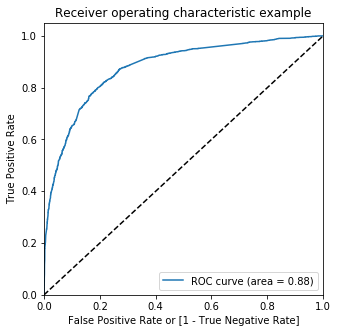

In [295]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [296]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Prospect ID,,,,,,,,,,,,,
22b1f1dc-97ad-4477-b123-579e9194a128,0.0,0.091895,0,1,0,0,0,0,0,0,0,0,0
525bc35d-8098-42fb-836b-4389cef11f14,0.0,0.253592,0,1,1,1,0,0,0,0,0,0,0
0f468d47-c064-455e-b8bc-74843b6a2c6a,0.0,0.462438,0,1,1,1,1,1,0,0,0,0,0
9b6d6cb4-d943-47cd-b708-e09083a76f94,1.0,0.422756,0,1,1,1,1,1,0,0,0,0,0
493597b0-14bf-446b-b11b-3f0e38c424ae,0.0,0.418815,0,1,1,1,1,1,0,0,0,0,0


In [297]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381515  1.000000  0.000000
0.1   0.1  0.541804  0.973174  0.275713
0.2   0.2  0.768383  0.885679  0.696029
0.3   0.3  0.789010  0.839043  0.758147
0.4   0.4  0.810738  0.768056  0.837067
0.5   0.5  0.805542  0.651671  0.900458
0.6   0.6  0.792474  0.578209  0.924644
0.7   0.7  0.779247  0.502270  0.950102
0.8   0.8  0.757046  0.411061  0.970468
0.9   0.9  0.721934  0.290549  0.988035


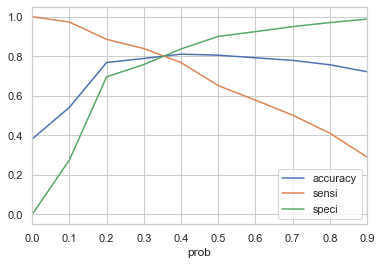

In [298]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set(style='whitegrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [299]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
Prospect ID,,,,,,,,,,,,,,
22b1f1dc-97ad-4477-b123-579e9194a128,0.0,0.091895,0,1,0,0,0,0,0,0,0,0,0,0
525bc35d-8098-42fb-836b-4389cef11f14,0.0,0.253592,0,1,1,1,0,0,0,0,0,0,0,0
0f468d47-c064-455e-b8bc-74843b6a2c6a,0.0,0.462438,0,1,1,1,1,1,0,0,0,0,0,1
9b6d6cb4-d943-47cd-b708-e09083a76f94,1.0,0.422756,0,1,1,1,1,1,0,0,0,0,0,1
493597b0-14bf-446b-b11b-3f0e38c424ae,0.0,0.418815,0,1,1,1,1,1,0,0,0,0,0,1


### Assigning Lead Score

In [300]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round((x*100),2))
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
Prospect ID,,,,,,,,,,,,,,,
22b1f1dc-97ad-4477-b123-579e9194a128,0.0,0.091895,0,1,0,0,0,0,0,0,0,0,0,0,9.19
525bc35d-8098-42fb-836b-4389cef11f14,0.0,0.253592,0,1,1,1,0,0,0,0,0,0,0,0,25.36
0f468d47-c064-455e-b8bc-74843b6a2c6a,0.0,0.462438,0,1,1,1,1,1,0,0,0,0,0,1,46.24
9b6d6cb4-d943-47cd-b708-e09083a76f94,1.0,0.422756,0,1,1,1,1,1,0,0,0,0,0,1,42.28
493597b0-14bf-446b-b11b-3f0e38c424ae,0.0,0.418815,0,1,1,1,1,1,0,0,0,0,0,1,41.88


In [301]:
# Let's check the overall accuracy.
accuracy_train = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [302]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3160,  768],
       [ 481, 1942]], dtype=int64)

In [303]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [304]:
# Calculate sensitivity of our logistic regression model
sensitivity_train = TP / float(TP+FN)
#calculate specificity
specificity_train = TN / float(TN+FP)
# Calculate false postive rate - predicting churn when customer does not have churned
fpRate_train = FP/ float(TN+FP)
# Positive predictive value 
positive_predictive_train = TP / float(TP+FP)
# Negative predictive value
ngRate_train = TN / float(TN+ FN)

In [305]:
print("Printing all values post optimal cut-off calculation\n")
print("Train Data Accuracy:            {} ".format(round(accuracy_train,4)))
print("Train Data Sensitivity:         {} ".format(round(sensitivity_train,4)))
print("Train Data Specificity:         {} ".format(round(specificity_train,4)))
print("Train Data False postive rate:  {} ".format(round(fpRate_train,4)))
print("Train Data Positive predictive: {} ".format(round(positive_predictive_train,4)))
print("Train Data Negative predictive: {} ".format(round(ngRate_train,4)))

Printing all values post optimal cut-off calculation

Train Data Accuracy:            0.8033 
Train Data Sensitivity:         0.8015 
Train Data Specificity:         0.8045 
Train Data False postive rate:  0.1955 
Train Data Positive predictive: 0.7166 
Train Data Negative predictive: 0.8679 


## Precision and Recall

#### Using confusion matrix

In [306]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3537,  391],
       [ 844, 1579]], dtype=int64)

##### Precision
TP / TP + FP

In [307]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.801522842639594

##### Recall
TP / TP + FN

In [308]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6516714816343376

#### Using sklearn utilities for the same

In [309]:
# Calculate Recall
recall_train = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
# Calculate Precision
precision_train = precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)
# Calculate F1 Score
F1_score_train =  (2* precision_train * recall_train)/(precision_train + recall_train)

In [310]:
print("Printing all values post optimal cut-off calculation\n")
print("Train Data Precision:    {} ".format(round(precision_train,4)))
print("Train Data Recall:       {} ".format(round(recall_train,4)))
print("Train Data F1 Score:     {} ".format(round(F1_score_train,4)))

Printing all values post optimal cut-off calculation

Train Data Precision:    0.8015 
Train Data Recall:       0.6517 
Train Data F1 Score:     0.7189 


### Precision and recall tradeoff

In [311]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

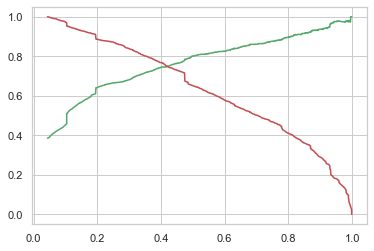

In [312]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [313]:
#Preparing Test Dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Lead_Origin_API,...,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other Notable Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Current_Ocupation_Housewife,Current_Ocupation_Other,Current_Ocupation_Student,Current_Ocupation_Unemployed,Current_Ocupation_Working Professional
Prospect ID,,,,,,,,,,,,,,,,,,,,,
2f3b20c1-fdd4-4455-95de-55e455d25413,0.490376,-0.746293,1.338033,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc,0.186555,-0.447512,-0.522248,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
fdb72c0d-49fd-489f-b635-321dbe6a93cb,0.490376,-0.082336,0.070812,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
415165bd-caff-408b-84be-2d4206f81ac9,0.186555,2.398279,0.831145,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
96da1864-e1ae-40cb-9e5c-6b92ee1557b6,0.186555,-0.690963,0.831145,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [314]:
X_test = X_test[columns2keep]
X_test.head()

,Total Time Spent on Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Others,Lead_Source_Reference,Specialization_Not Specified,Last Notable Activity_Email Opened,Last Notable Activity_Other Notable Activity,Last Notable Activity_SMS Sent,Current_Ocupation_Working Professional
Prospect ID,,,,,,,,,,,
2f3b20c1-fdd4-4455-95de-55e455d25413,-0.746293,0,0,0,0,0,1,0,0,0,0
1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc,-0.447512,0,0,0,0,0,1,0,0,0,0
fdb72c0d-49fd-489f-b635-321dbe6a93cb,-0.082336,1,0,0,0,0,0,1,0,0,0
415165bd-caff-408b-84be-2d4206f81ac9,2.398279,1,0,0,0,0,0,0,0,0,0
96da1864-e1ae-40cb-9e5c-6b92ee1557b6,-0.690963,1,0,0,0,0,0,0,0,1,0


In [315]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2723, 12)

In [316]:
y_test_pred = res.predict(X_test_sm)

In [317]:
y_test_pred[:10]

Prospect ID
2f3b20c1-fdd4-4455-95de-55e455d25413    0.049456
1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc    0.067471
fdb72c0d-49fd-489f-b635-321dbe6a93cb    0.203602
415165bd-caff-408b-84be-2d4206f81ac9    0.654749
96da1864-e1ae-40cb-9e5c-6b92ee1557b6    0.327620
a239e59d-575a-4609-a892-796f908a8ff5    0.197532
e3a1ba17-f42a-4617-aed9-ae87af386e78    0.197532
4dd2c291-f7bb-4d96-856a-3732fe126b73    0.360333
50fa9f12-424e-4885-8e98-34ff7aa37d4d    0.933986
89235290-d22f-4273-a0c0-6705fbaaad9d    0.335240
dtype: float64

In [318]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_pred_final_temp = pd.DataFrame(y_test_pred)
y_pred_final = pd.merge(y_test_df,y_pred_final_temp,on='Prospect ID')
y_pred_final.head()

,Converted,0
Prospect ID,,
2f3b20c1-fdd4-4455-95de-55e455d25413,0.0,0.049456
1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc,0.0,0.067471
fdb72c0d-49fd-489f-b635-321dbe6a93cb,0.0,0.203602
415165bd-caff-408b-84be-2d4206f81ac9,1.0,0.654749
96da1864-e1ae-40cb-9e5c-6b92ee1557b6,0.0,0.327620


In [319]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [320]:
y_pred_final.head()

,Converted,Converted_prob
Prospect ID,,
2f3b20c1-fdd4-4455-95de-55e455d25413,0.0,0.049456
1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc,0.0,0.067471
fdb72c0d-49fd-489f-b635-321dbe6a93cb,0.0,0.203602
415165bd-caff-408b-84be-2d4206f81ac9,1.0,0.654749
96da1864-e1ae-40cb-9e5c-6b92ee1557b6,0.0,0.327620


In [321]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Converted_prob,final_predicted
Prospect ID,,,
2f3b20c1-fdd4-4455-95de-55e455d25413,0.0,0.049456,0
1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc,0.0,0.067471,0
fdb72c0d-49fd-489f-b635-321dbe6a93cb,0.0,0.203602,0
415165bd-caff-408b-84be-2d4206f81ac9,1.0,0.654749,1
96da1864-e1ae-40cb-9e5c-6b92ee1557b6,0.0,0.327620,0


In [322]:
# Let's check the overall accuracy.
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [323]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1386,  325],
       [ 215,  797]], dtype=int64)

In [324]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [325]:
# Let's see the sensitivity of our logistic regression model
sensitivity_test = TP / float(TP+FN)

# Let us calculate specificity
specificity_test = TN / float(TN+FP)

In [326]:
print("Printing Accuracy, Specificity and Sensitivity of test data \n")
print("Test Data Accuracy:            {} ".format(round(accuracy_test,4)))
print("Test Data Sensitivity:         {} ".format(round(sensitivity_test,4)))
print("Test Data Specificity:         {} ".format(round(specificity_test,4)))

Printing Accuracy, Specificity and Sensitivity of test data 

Test Data Accuracy:            0.8017 
Test Data Sensitivity:         0.7875 
Test Data Specificity:         0.8101 


### Assigning Lead Score

In [327]:
# Assigning Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round((x*100),2))
y_pred_final.head(10)

,Converted,Converted_prob,final_predicted,Lead_Score
Prospect ID,,,,
2f3b20c1-fdd4-4455-95de-55e455d25413,0.0,0.049456,0,4.95
1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc,0.0,0.067471,0,6.75
fdb72c0d-49fd-489f-b635-321dbe6a93cb,0.0,0.203602,0,20.36
415165bd-caff-408b-84be-2d4206f81ac9,1.0,0.654749,1,65.47
96da1864-e1ae-40cb-9e5c-6b92ee1557b6,0.0,0.327620,0,32.76
a239e59d-575a-4609-a892-796f908a8ff5,1.0,0.197532,0,19.75
e3a1ba17-f42a-4617-aed9-ae87af386e78,0.0,0.197532,0,19.75
4dd2c291-f7bb-4d96-856a-3732fe126b73,0.0,0.360333,1,36.03
50fa9f12-424e-4885-8e98-34ff7aa37d4d,1.0,0.933986,1,93.40


## Precision and Recall

#### Using Confusion Matrix 

In [328]:
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1386,  325],
       [ 215,  797]], dtype=int64)

##### Precision
TP / TP + FP

In [329]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7103386809269162

##### Recall
TP / TP + FN

In [330]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7875494071146245

#### Using sklearn utilities for the same

In [331]:
recall_test = recall_score(y_pred_final.Converted, y_pred_final.final_predicted )
precision_test = precision_score(y_pred_final.Converted, y_pred_final.final_predicted )
F1_score_test =  (2* precision_test * recall_test)/(precision_test + recall_test)

In [332]:
print("Printing Precision and Recall of test data\n")
print("Test Data Precision:    {} ".format(round(precision_test,4)))
print("Test Data Recall:       {} ".format(round(recall_test,4)))
print("Test Data F1 Score:     {} ".format(round(F1_score_test,4)))

Printing Precision and Recall of test data

Test Data Precision:    0.7103 
Test Data Recall:       0.7875 
Test Data F1 Score:     0.747 


# Final Result

###  Train data result

In [333]:
print("Printing Results of Train Data\n")
print("Train Data Accuracy:     {} ".format(round(accuracy_train,4)))
print("Train Data Sensitivity:  {} ".format(round(sensitivity_train,4)))
print("Train Data Specificity:  {} ".format(round(specificity_train,4)))
print("Train Data Precision:    {} ".format(round(precision_train,4)))
print("Train Data Recall:       {} ".format(round(recall_train,4)))
print("Train Data F1 Score:     {} ".format(round(F1_score_train,4)))

Printing Results of Train Data

Train Data Accuracy:     0.8033 
Train Data Sensitivity:  0.8015 
Train Data Specificity:  0.8045 
Train Data Precision:    0.8015 
Train Data Recall:       0.6517 
Train Data F1 Score:     0.7189 


In [334]:
Lead_train = y_train_pred_final.copy()
Lead_train.drop(["Converted","Converted_prob","Predicted",0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                 "final_predicted"], 1, inplace = True)
Lead_train.reset_index(inplace=True)
Lead_train.head()

,Prospect ID,Lead_Score
0,22b1f1dc-97ad-4477-b123-579e9194a128,9.19
1,525bc35d-8098-42fb-836b-4389cef11f14,25.36
2,0f468d47-c064-455e-b8bc-74843b6a2c6a,46.24
3,9b6d6cb4-d943-47cd-b708-e09083a76f94,42.28
4,493597b0-14bf-446b-b11b-3f0e38c424ae,41.88


### Test data Result

In [335]:
print("Printing Results of Test Data \n")
print("Test Data Accuracy:     {} ".format(round(accuracy_test,4)))
print("Test Data Sensitivity:  {} ".format(round(sensitivity_test,4)))
print("Test Data Specificity:  {} ".format(round(specificity_test,4)))
print("Test Data Precision:    {} ".format(round(precision_test,4)))
print("Test Data Recall:       {} ".format(round(recall_test,4)))
print("Test Data F1 Score:     {} ".format(round(F1_score_test,4)))

Printing Results of Test Data 

Test Data Accuracy:     0.8017 
Test Data Sensitivity:  0.7875 
Test Data Specificity:  0.8101 
Test Data Precision:    0.7103 
Test Data Recall:       0.7875 
Test Data F1 Score:     0.747 


In [336]:
Lead_test = y_pred_final.copy()
Lead_test.drop(['Converted', 'Converted_prob', 'final_predicted'], 1, inplace = True)
Lead_test.reset_index(inplace=True)
Lead_test.head()

,Prospect ID,Lead_Score
0,2f3b20c1-fdd4-4455-95de-55e455d25413,4.95
1,1b4cfa2d-fbb8-4ff8-8c99-fd9aed1c0ddc,6.75
2,fdb72c0d-49fd-489f-b635-321dbe6a93cb,20.36
3,415165bd-caff-408b-84be-2d4206f81ac9,65.47
4,96da1864-e1ae-40cb-9e5c-6b92ee1557b6,32.76
